In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set() 
import pandas as pd

In [23]:
data1 = pd.read_csv("Wells.csv")

In [24]:
data1.shape

(55945, 22)

In [25]:
data2=data1[['Well','GR']]

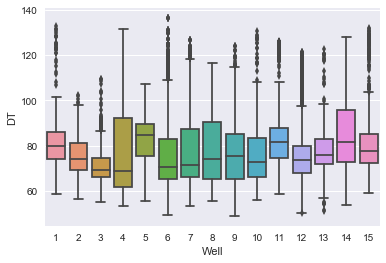

In [26]:
sns.boxplot(x=data1['Well'],y=data1['DT'])

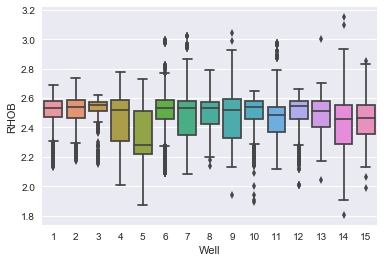

In [27]:
sns.boxplot(x=data1['Well'],y=data1['RHOB'])

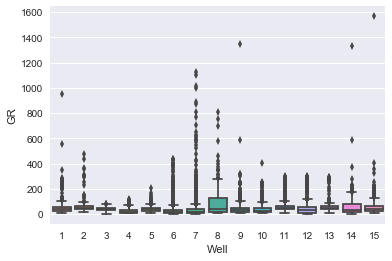

In [28]:
sns.boxplot(x=data2['Well'],y=data2['GR'])

In [29]:
data3=data2[(data2['GR']<250)]

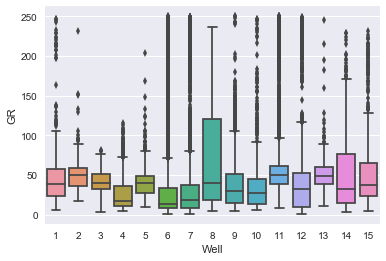

In [30]:
sns.boxplot(x=data3['Well'],y=data3['GR'])

In [31]:
d=data1[data1['Well']<13]


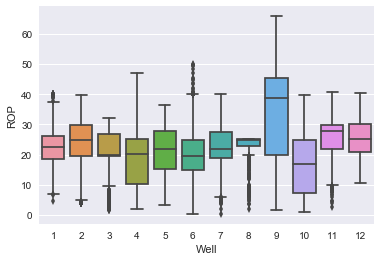

In [32]:
sns.boxplot(x=d['Well'],y=d['ROP'])

In [33]:
D1=d[(d['WOB']>0)&(d['WOB']<25)]

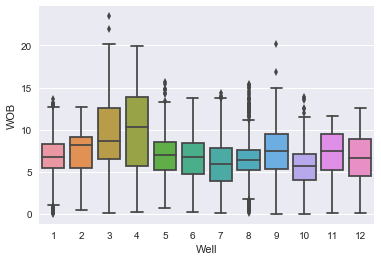

In [34]:
sns.boxplot(x=D1['Well'],y=D1['WOB'])

In [35]:
D2=d[(d['Torque']>0)]

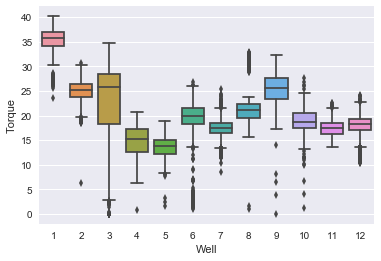

In [36]:
sns.boxplot(x=D2['Well'],y=D2['Torque'])

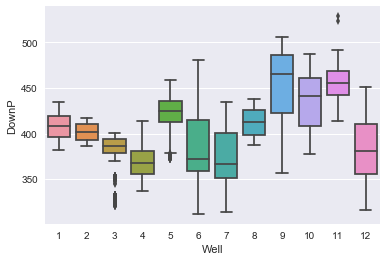

In [37]:
sns.boxplot(x=d['Well'],y=d['DownP'])

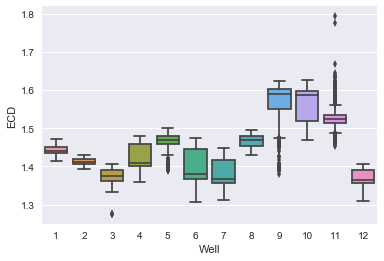

In [106]:

sns.boxplot(x=d['Well'],y=d['ECD'])

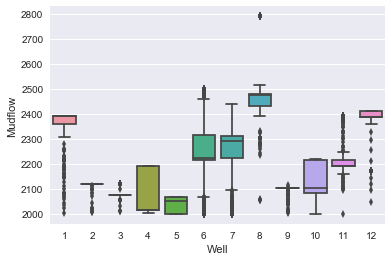

In [109]:
D_M=d[(d['Mudflow']>2000)]
sns.boxplot(x=D_M['Well'],y=D_M['Mudflow'])

In [43]:
d_t_T=d[['Torque','DownT']]
d_t_T=d_t_T[(d_t_T['Torque']>0)]

                            OLS Regression Results                            
Dep. Variable:                   NPHI   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 3.192e+05
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        19:33:49   Log-Likelihood:             1.0526e+05
No. Observations:               55945   AIC:                        -2.105e+05
Df Residuals:                   55943   BIC:                        -2.105e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2998      0.001   -357.486      0.0

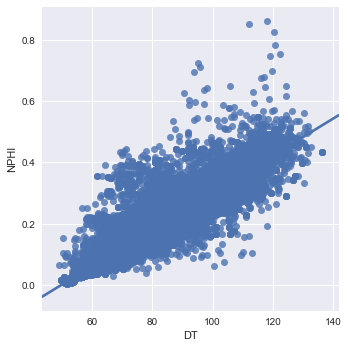

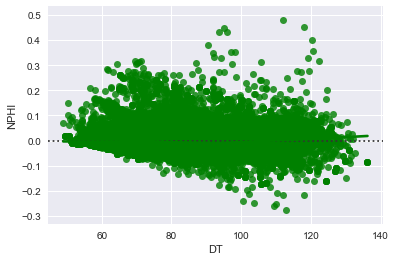

In [110]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


model = ols("NPHI ~ DT", data1).fit()
print(model.summary())
print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# Peform analysis of variance on fitted linear model - this is ANOVA
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

sns.lmplot(y="NPHI", x="DT", data=data1);
plt.show()
sns.residplot(y="NPHI", x="DT", data=data1,lowess=True, color="g")
plt.show()


                            OLS Regression Results                            
Dep. Variable:                 Torque   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                 1.355e+04
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        18:57:50   Log-Likelihood:            -1.3964e+05
No. Observations:               51860   AIC:                         2.793e+05
Df Residuals:                   51858   BIC:                         2.793e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1219      0.118     43.408      0.0

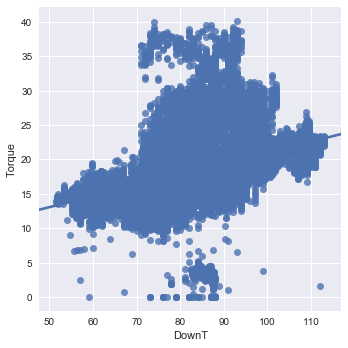

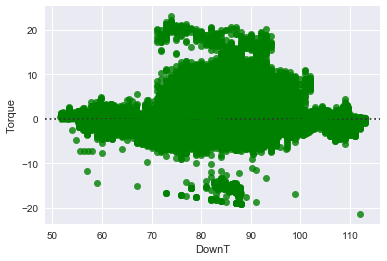

In [47]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


model = ols("Torque ~ DownT", d_t_T).fit()
print(model.summary())
print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# Peform analysis of variance on fitted linear model - this is ANOVA
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

sns.lmplot(x="DownT", y="Torque", data=d_t_T);
plt.show()
sns.residplot(x="DownT", y="Torque", data=d_t_T,lowess=True, color="g")
plt.show()


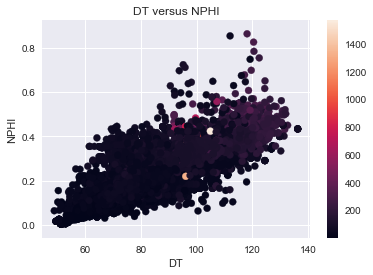

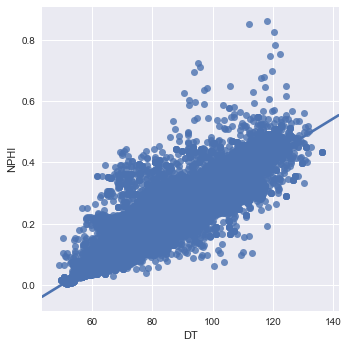

In [286]:
from statsmodels.formula.api import ols

fig, ax = plt.subplots()
plt.xlabel('DT')
plt.ylabel('NPHI')

plt.title('DT versus NPHI')
plt.scatter(data1['DT'], data1['NPHI'], c=data1['GR'])
plt.colorbar()
model = ols("NPHI ~ DT", data1).fit()
sns.lmplot(x="DT", y="NPHI",  data=data1);
plt.show()

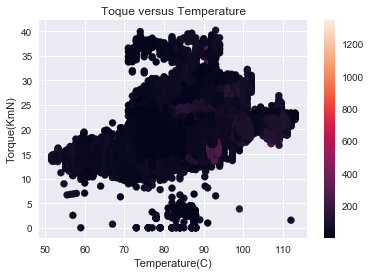

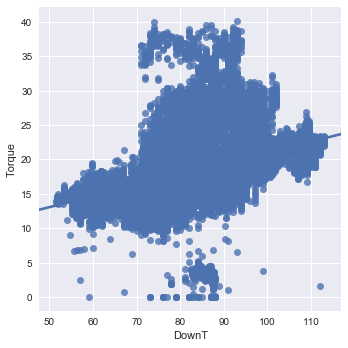

In [287]:

fig, ax = plt.subplots()
plt.xlabel('Temperature(C)')
plt.ylabel('Torque(KmN)')

plt.title('Toque versus Temperature')
plt.scatter(D2['DownT'], D2['Torque'], c=D2['GR'])
plt.colorbar()
model = ols("Torque ~ DownT", D2).fit()
sns.lmplot(x="DownT", y="Torque", data=D2);

In [267]:
well=data1[['Well','GR','DT','RHOB']]


In [268]:
well1=well.values

In [269]:
extractedData=well1[:,[1,2,3]]

In [270]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(extractedData)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
y_kmeans1 = kmeans.predict(extractedData)

[1 1 1 ... 0 0 0]
[[ 77.40086155  87.08781969   2.46068618]
 [ 19.62305077  72.71641398   2.48998424]
 [226.78879213 114.59339843   2.28895929]]


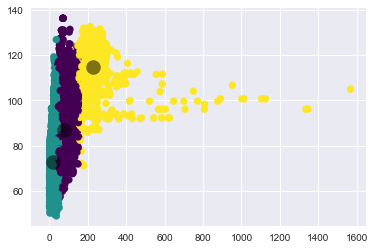

In [271]:
plt.scatter(extractedData[:, 0], extractedData[:, 1], c=y_kmeans1, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

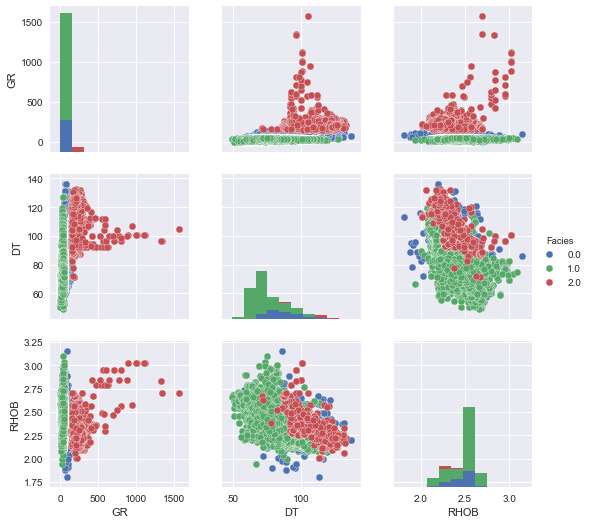

In [272]:
sns.set(style = 'darkgrid') # Set the background to dark
labelled_data = well1

well1 [:,0] = y_kmeans1

labelled_dataframe = pd.DataFrame(data = labelled_data[:,:], columns = ['Facies','GR','DT', 'RHOB'])

sns.pairplot(labelled_dataframe, vars=['GR','DT', 'RHOB'] ,hue = 'Facies') # Create a matrix scatterplot

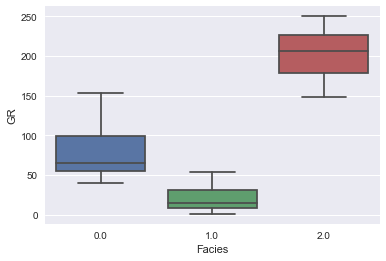

In [273]:
data3=data2[(data2['GR']<250)]
sns.boxplot(x=labelled_dataframe['Facies'],y=data3['GR'])


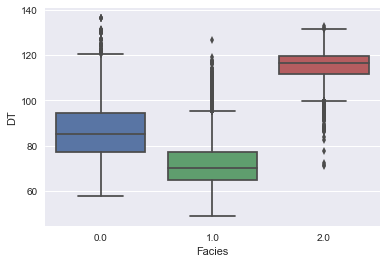

In [274]:
sns.boxplot(x=labelled_dataframe['Facies'],y=labelled_dataframe['DT'])

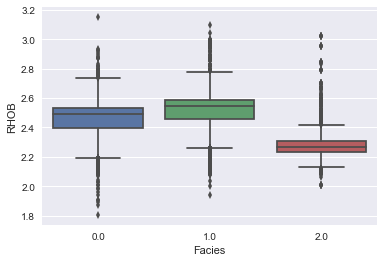

In [275]:

sns.boxplot(x=labelled_dataframe['Facies'],y=labelled_dataframe['RHOB'])

In [276]:
lb_df=labelled_dataframe.copy()

In [277]:
lb_df.shape


(55945, 4)

In [278]:
logFacies=lb_df[51877:55945]

In [279]:
data4=data1[51877:55945]

In [280]:

data4=data4[['Well','Vquartz','Vsh','Vcarb']]

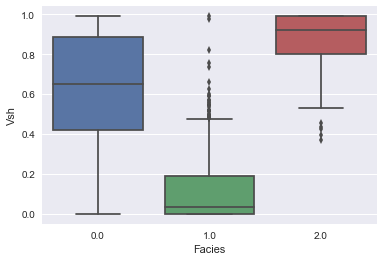

In [282]:
sns.boxplot(x=logFacies['Facies'],y=data4['Vsh'])

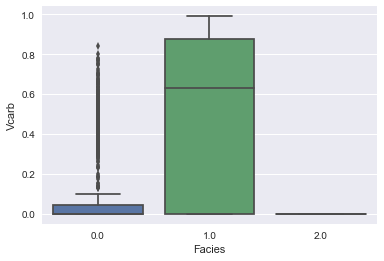

In [283]:
sns.boxplot(x=logFacies['Facies'],y=data4['Vcarb'])

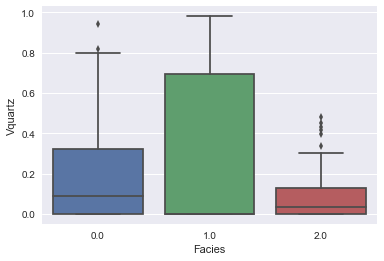

In [284]:
sns.boxplot(x=logFacies['Facies'],y=data4['Vquartz'])

In [85]:
# core data -> mineralogy
# use MWD (8 variables) predict clusters
# PCA and KNN 
# KNN: facies - target , MWD - features 

In [17]:
d=data1[data1['Well']<13]


In [18]:
MWD1=d[['Well','ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD']]

In [19]:
MWD=d[['ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD']]
MWD=MWD.values

In [20]:
#Store features in X
X=MWD

In [21]:
# store facies in Y as target
y= y_kmeans1[0:51877]


In [22]:
y.shape

(51877,)

In [23]:
X.shape

(51877, 7)

In [24]:
n_samples , n_features = X.data.shape ## rows , column format... rows are sample, columns are features

print('Number of samples:', n_samples)

Number of samples: 51877


In [25]:
# number of features
print('Number of features:', n_features)

Number of features: 7


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.model_selection  import validation_curve
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline

classifier= KNeighborsClassifier()

In [27]:
# train/test split 
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=114, train_size=0.8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [28]:
X_train.shape

(41501, 7)

In [29]:
y_train.shape

(41501,)

In [30]:
# train the model, the model learns from learning data
classifier.fit(X_train, y_train)

# apply the trained model on test data
y_pred = classifier.predict(X_test)

print("Fraction Correct [Accuracy]:") 
#how many times they're 1 and 2 prediction of class and for a sample divide by total number of sample
print(np.sum(y_pred == y_test) / float(len(y_test)))

print("Accuracy using inbuilt score function") #test data: collection of featurescompare preduiction with test data
print(classifier.score(X_test,y_test))

Fraction Correct [Accuracy]:
0.9382228218966847
Accuracy using inbuilt score function
0.9382228218966847


In [31]:
# train/test split 
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=114, train_size=0.8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
classifier= KNeighborsClassifier()

cv = KFold(n_splits=3, shuffle= True)   # by default the data is not shuffled

cross_val_score(classifier, X, y, cv=cv)

array([0.93396172, 0.93442054, 0.93488318])

In [33]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
cross_val_score(classifier, X, y, cv=cv)

array([0.9341352 , 0.93465186, 0.93303262])

In [34]:
cv = ShuffleSplit(n_splits=3)
cross_val_score(classifier, X, y, cv=cv)

array([0.94005397, 0.93754819, 0.93909021])

In [36]:
# KNN classification
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

cv = KFold(shuffle=True) #cross validation can use shuffle split if you want 
# find good number of user 
# for each parameter setting do cross-validation:
# list seperated by comma 
for n_neighbors in [1, 3, 5, 10, 20]:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=n_neighbors), X, y, cv=cv)
    print("n_neighbors: %d, average score: %f" % (n_neighbors, np.mean(scores)))
    

n_neighbors: 1, average score: 0.938605
n_neighbors: 3, average score: 0.938431
n_neighbors: 5, average score: 0.934672
n_neighbors: 10, average score: 0.926827
n_neighbors: 20, average score: 0.915396


In [37]:
scores

array([0.9180015 , 0.91441129, 0.91377516])

In [38]:
# Find the optimal number of Neighbors and Proximity Metric for kNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=11, train_size=0.8)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [39]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle = True, random_state= 123)

In [40]:
param_grid = {'p':[1, 1.5, 2, 3, 4],'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]}

In [41]:
gs = GridSearchCV(classifier, param_grid=param_grid, cv=cv, verbose=3)
# perform 5 fold cross validation

gs.fit(X_train, y_train)

print("Score on test set: %f" % gs.score(X_test, y_test))
print("Best parameters: %s" % gs.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] n_neighbors=3, p=1 ..............................................
[CV] ..... n_neighbors=3, p=1, score=0.9429707264185038, total=   0.1s
[CV] n_neighbors=3, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ...... n_neighbors=3, p=1, score=0.936962336441842, total=   0.0s
[CV] n_neighbors=3, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ..... n_neighbors=3, p=1, score=0.9360948456589315, total=   0.2s
[CV] n_neighbors=3, p=1.5 ............................................
[CV] ... n_neighbors=3, p=1.5, score=0.9381279363932057, total=   1.4s
[CV] n_neighbors=3, p=1.5 ............................................
[CV] ... n_neighbors=3, p=1.5, score=0.9339261187016554, total=   1.6s
[CV] n_neighbors=3, p=1.5 ............................................
[CV] ... n_neighbors=3, p=1.5, score=0.9328417552230174, total=   1.3s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ..... n_neighbors=3, p=2, score=0.9354535598120708, total=   0.1s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ..... n_neighbors=3, p=2, score=0.9314682281500759, total=   0.1s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ..... n_neighbors=3, p=2, score=0.9308176100628931, total=   0.1s
[CV] n_neighbors=3, p=3 ..............................................
[CV] .

[CV] .... n_neighbors=11, p=1, score=0.9285146367907481, total=   0.2s
[CV] n_neighbors=11, p=1 .............................................
[CV] .... n_neighbors=11, p=1, score=0.9246005927853683, total=   0.1s
[CV] n_neighbors=11, p=1 .............................................
[CV] .... n_neighbors=11, p=1, score=0.9258295380611581, total=   0.2s
[CV] n_neighbors=11, p=1.5 ...........................................
[CV] ... n_neighbors=11, p=1.5, score=0.925623418865197, total=   1.6s
[CV] n_neighbors=11, p=1.5 ...........................................
[CV] ... n_neighbors=11, p=1.5, score=0.920913756957999, total=   1.6s
[CV] n_neighbors=11, p=1.5 ...........................................
[CV] .. n_neighbors=11, p=1.5, score=0.9228656112195475, total=   1.6s
[CV] n_neighbors=11, p=2 .............................................
[CV] .... n_neighbors=11, p=2, score=0.9233827249728949, total=   0.2s
[CV] n_neighbors=11, p=2 .............................................
[CV] .

[CV] .... n_neighbors=17, p=4, score=0.9089134677944047, total=   1.5s
[CV] n_neighbors=17, p=4 .............................................
[CV] .... n_neighbors=17, p=4, score=0.9083351406057977, total=   1.5s
Score on test set: 0.946029
Best parameters: {'n_neighbors': 3, 'p': 1}


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  5.9min finished


In [42]:
gs.predict(X)

array([0, 0, 0, ..., 2, 2, 2])

In [43]:
print(gs.best_params_)

{'n_neighbors': 3, 'p': 1}


In [44]:
print(gs.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])


In [45]:
cv_res = pd.DataFrame(gs.cv_results_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [95]:
# generate a subset of the table
cv_res_tiny = cv_res[['param_n_neighbors', 'param_p', 'mean_test_score']]

# rank them based on test scores
cv_res_tiny.sort_values(by='mean_test_score', ascending=False).head(10)

,param_n_neighbors,param_p,mean_test_score
0,3,1,0.939327
1,3,1.5,0.936749
5,5,1,0.936339
2,3,2,0.934532
6,5,1.5,0.934243
10,7,1,0.932652
3,3,3,0.931496
7,5,2,0.931472
4,3,4,0.930484
11,7,1.5,0.929688


In [46]:
print(gs.best_score_) 

0.9386761764776752


In [47]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
from  sklearn.model_selection import cross_val_score
cv = StratifiedKFold(n_splits=4,shuffle=True,random_state=14)
cross_val_score(classifier, X_train, y_train, cv=cv)

array([0.93042305, 0.93301205, 0.93407229, 0.93213804])

In [48]:
n_neighbors = [1,2,3, 5, 7, 9, 11, 13, 15,20,25,30]
train_scores, test_scores = validation_curve(classifier, X_train, y_train, param_name="n_neighbors",
                                             param_range=n_neighbors,cv=cv)

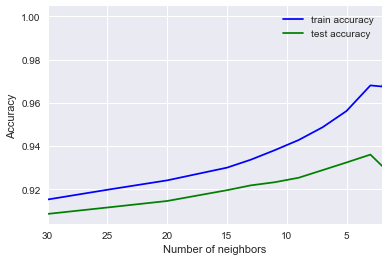

In [49]:
plt.plot(n_neighbors, train_scores.mean(axis=1), 'b', label="train accuracy") #mean
plt.plot(n_neighbors, test_scores.mean(axis=1), 'g', label="test accuracy") #mean

plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.xlim([30, 2])
plt.legend(loc="best");


Split the Well

Train wells: 1 to 9
Test wells: 10 to 12

In [50]:
X_train=MWD[0:39461]
X_train.shape

(39461, 7)

In [51]:
y_train=y_kmeans1[0:39461]
y_train.shape

(39461,)

In [52]:
X_test=MWD[39461:51877]
X_test.shape

(12416, 7)

In [53]:
y_test=y_kmeans1[39461:51877]
y_test.shape

(12416,)

In [54]:
# train the model, the model learns from learning data
classifier.fit(X_train, y_train)

# apply the trained model on test data
y_pred = classifier.predict(X_test)

print("Fraction Correct [Accuracy]:") 
#how many times they're 1 and 2 prediction of class and for a sample divide by total number of sample
print(np.sum(y_pred == y_test) / float(len(y_test)))

print("Accuracy using inbuilt score function") #test data: collection of featurescompare preduiction with test data
print(classifier.score(X_test,y_test))

Fraction Correct [Accuracy]:
0.6189594072164949
Accuracy using inbuilt score function
0.6189594072164949


In [55]:
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
classifier= KNeighborsClassifier()

cv = KFold(n_splits=3, shuffle= True)   # by default the data is not shuffled

cross_val_score(classifier, X_train, y_train, cv=cv)

array([0.94336324, 0.93743348, 0.94191439])

In [56]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
cross_val_score(classifier, X_train, y_train, cv=cv)

array([0.94063094, 0.94024177, 0.94153425])

In [57]:
# KNN classification
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

cv = KFold(shuffle=True) #cross validation can use shuffle split if you want 
# find good number of user 
# for each parameter setting do cross-validation:
# list seperated by comma 
for n_neighbors in [1, 3, 5, 10, 20]:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=n_neighbors), X_train, y_train, cv=cv)
    print("n_neighbors: %d, average score: %f" % (n_neighbors, np.mean(scores)))

n_neighbors: 1, average score: 0.942171
n_neighbors: 3, average score: 0.943894
n_neighbors: 5, average score: 0.942804
n_neighbors: 10, average score: 0.935759
n_neighbors: 20, average score: 0.927802


In [58]:
scores

array([0.92724646, 0.92876692, 0.92739299])

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle = True, random_state= 123)
param_grid = {'p':[1, 1.5, 2, 3, 4],'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]}
gs = GridSearchCV(classifier, param_grid=param_grid, cv=cv, verbose=3)
# perform 5 fold cross validation

gs.fit(X_train, y_train)

print("Score on test set: %f" % gs.score(X_test, y_test))
print("Best parameters: %s" % gs.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] n_neighbors=3, p=1 ..............................................
[CV] ..... n_neighbors=3, p=1, score=0.9511212466742683, total=   0.1s
[CV] n_neighbors=3, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..... n_neighbors=3, p=1, score=0.9485288527332167, total=   0.0s
[CV] n_neighbors=3, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ..... n_neighbors=3, p=1, score=0.9498973618185965, total=   0.0s
[CV] n_neighbors=3, p=1.5 ............................................
[CV] ...... n_neighbors=3, p=1.5, score=0.9480805777271, total=   1.0s
[CV] n_neighbors=3, p=1.5 ............................................
[CV] ... n_neighbors=3, p=1.5, score=0.9425986466965711, total=   1.0s
[CV] n_neighbors=3, p=1.5 ............................................
[CV] ... n_neighbors=3, p=1.5, score=0.9473884284954003, total=   1.0s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ..... n_neighbors=3, p=2, score=0.9444317749904979, total=   0.1s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ..... n_neighbors=3, p=2, score=0.9400897133733749, total=   0.1s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ...... n_neighbors=3, p=2, score=0.944119212346993, total=   0.1s
[CV] n_neighbors=3, p=3 ..............................................
[CV] .

[CV] ..... n_neighbors=11, p=1, score=0.943367540858989, total=   0.3s
[CV] n_neighbors=11, p=1 .............................................
[CV] .... n_neighbors=11, p=1, score=0.9387212042879951, total=   0.1s
[CV] n_neighbors=11, p=1 .............................................
[CV] .... n_neighbors=11, p=1, score=0.9418383638713601, total=   0.2s
[CV] n_neighbors=11, p=1.5 ...........................................
[CV] .. n_neighbors=11, p=1.5, score=0.9385024705435195, total=   1.6s
[CV] n_neighbors=11, p=1.5 ...........................................
[CV] .. n_neighbors=11, p=1.5, score=0.9344636204668136, total=   1.5s
[CV] n_neighbors=11, p=1.5 ...........................................
[CV] .. n_neighbors=11, p=1.5, score=0.9377328366152209, total=   1.6s
[CV] n_neighbors=11, p=2 .............................................
[CV] .... n_neighbors=11, p=2, score=0.9366020524515394, total=   0.1s
[CV] n_neighbors=11, p=2 .............................................
[CV] .

[CV] .... n_neighbors=17, p=4, score=0.9229833498061278, total=   2.0s
[CV] n_neighbors=17, p=4 .............................................
[CV] .... n_neighbors=17, p=4, score=0.9263285942370562, total=   1.5s
Score on test set: 0.667848
Best parameters: {'n_neighbors': 3, 'p': 1}


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  6.2min finished


In [60]:
gs.predict(X)

array([0, 0, 0, ..., 2, 2, 2])

In [61]:
print("Best parameters: %s" % gs.best_params_)

Best parameters: {'n_neighbors': 3, 'p': 1}


In [62]:
cv_res = pd.DataFrame(gs.cv_results_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [63]:
# generate a subset of the table
cv_res_tiny = cv_res[['param_n_neighbors', 'param_p', 'mean_test_score']]

# rank them based on test scores
cv_res_tiny.sort_values(by='mean_test_score', ascending=False).head(5)

,param_n_neighbors,param_p,mean_test_score
0,3,1,0.949849
5,5,1,0.946884
1,3,1.5,0.946023
10,7,1,0.945440
6,5,1.5,0.943691


In [64]:
print("Score on test set: %f" % gs.score(X_test, y_test))

Score on test set: 0.667848


In [65]:
print(gs.best_score_) 

0.9498492182154532


In [9]:
extractedData=well1[:,[1,2,3]]
extractedData

array([[13.4058, 77.1874,  2.4838],
       [15.2468, 75.5047,  2.4837],
       [11.2243, 75.5697,  2.4823],
       ...,
       [57.499 , 71.9931,  2.5311],
       [56.785 , 72.759 ,  2.4731],
       [61.722 , 72.8121,  2.492 ]])

In [10]:
# Import a few clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


NameError: name 'labels' is not defined

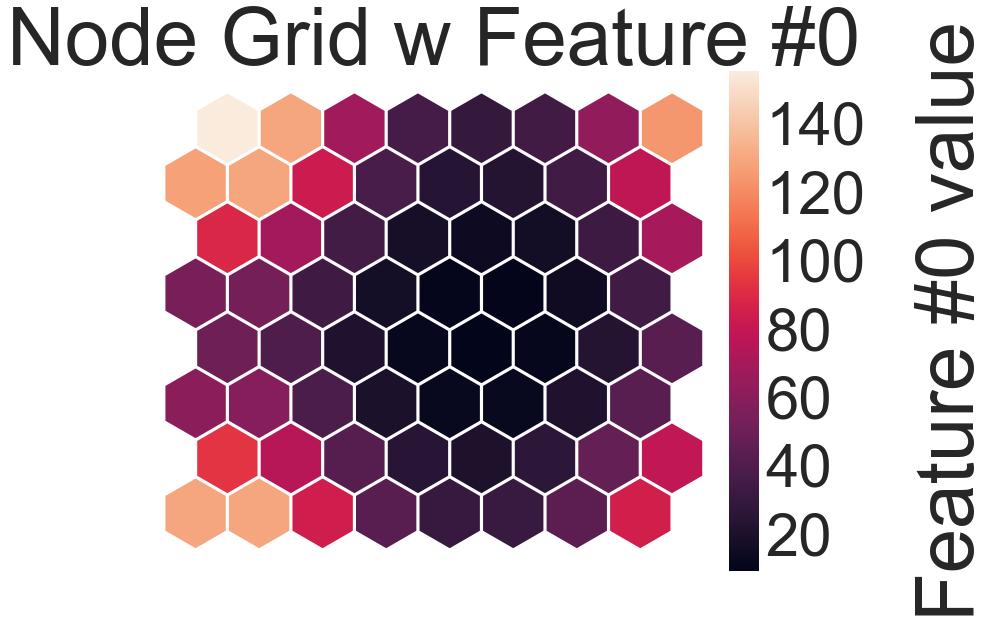

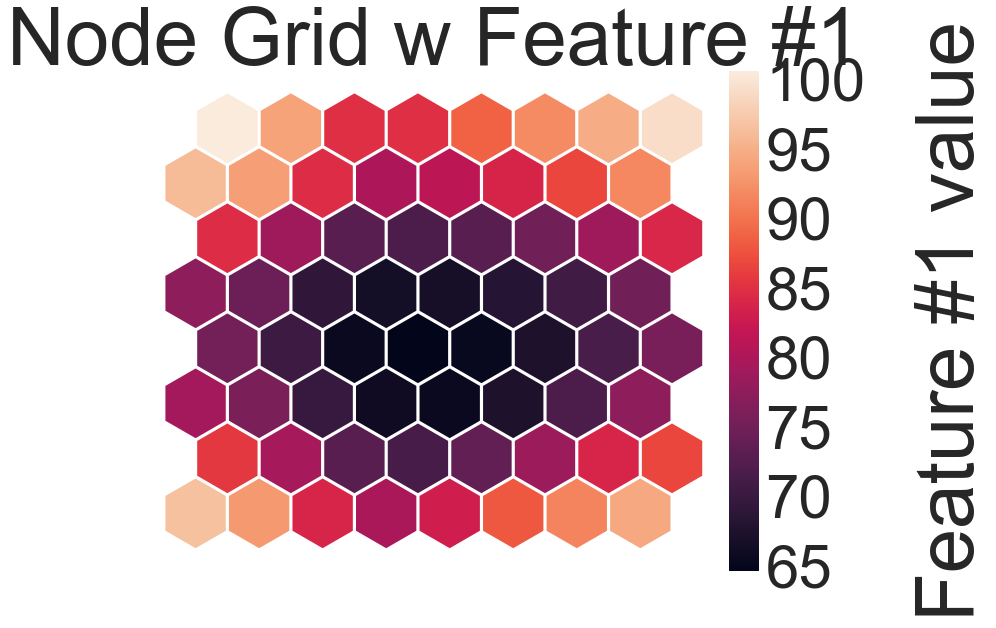

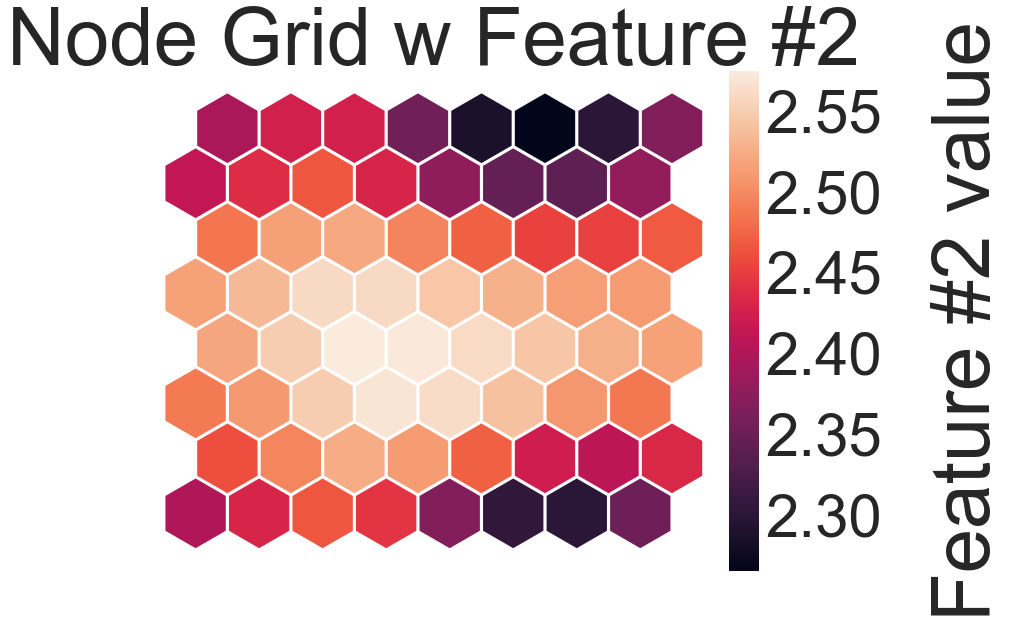

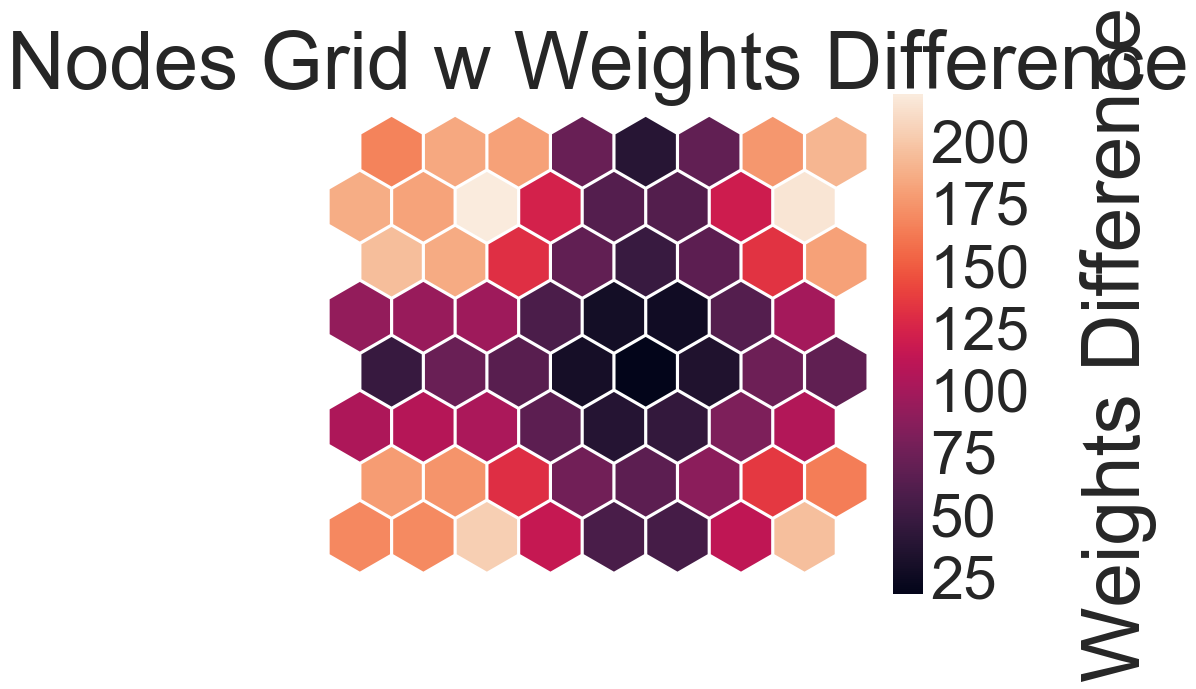

In [11]:
#Import the library
import SimpSOM as sps

#Build a network 20x20 with a weights format taken from the raw_data and activate Periodic Boundary Conditions. 
net = sps.somNet(8, 8, extractedData, PBC=True)

#Train the network for 10000 epochs and with initial learning rate of 0.01. 
net.train(0.1, 3000)

#Save the weights to file
net.save('filename_weights')

#Print a map of the network nodes and colour them according to the first feature (column number 0) of the dataset
#and then according to the distance between each node and its neighbours.
net.nodes_graph(colnum=0)
net.nodes_graph(colnum=1)
net.nodes_graph(colnum=2)

net.diff_graph()

#Project the datapoints on the new 2D network map.
net.project(extractedData, labels=labels)

#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(extractedData, type='qthresh')

In [12]:
data4=data4[['Well','Vquartz','Vsh','Vcarb']]
core=data4.values
extractedData=core[:,[1,2,3]]

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

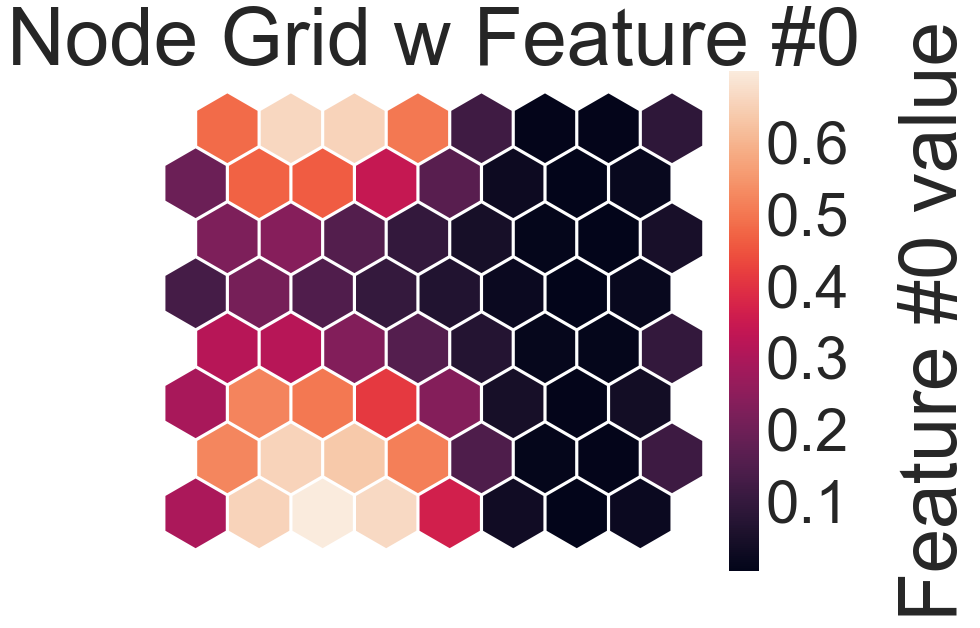

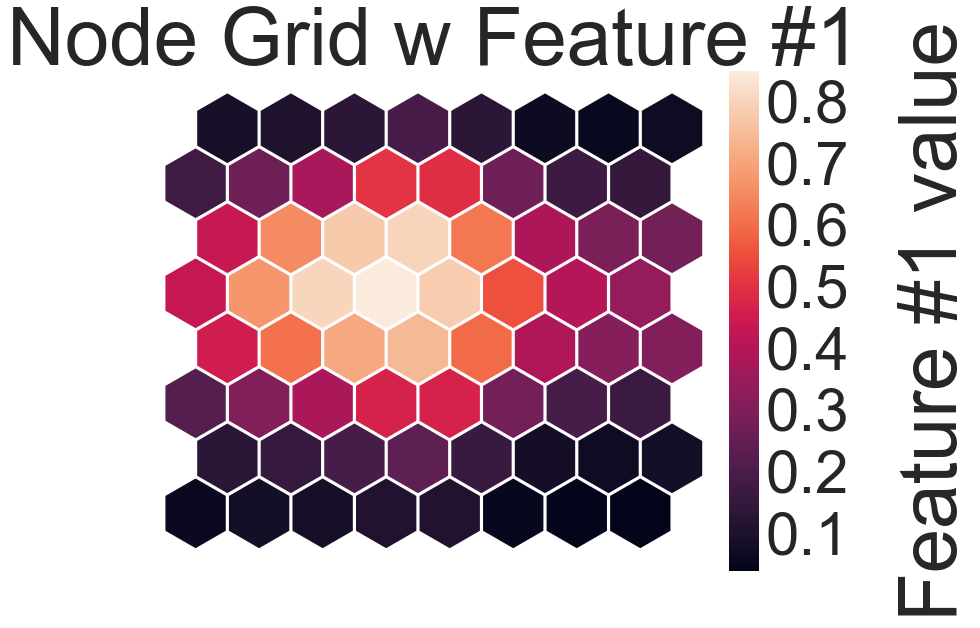

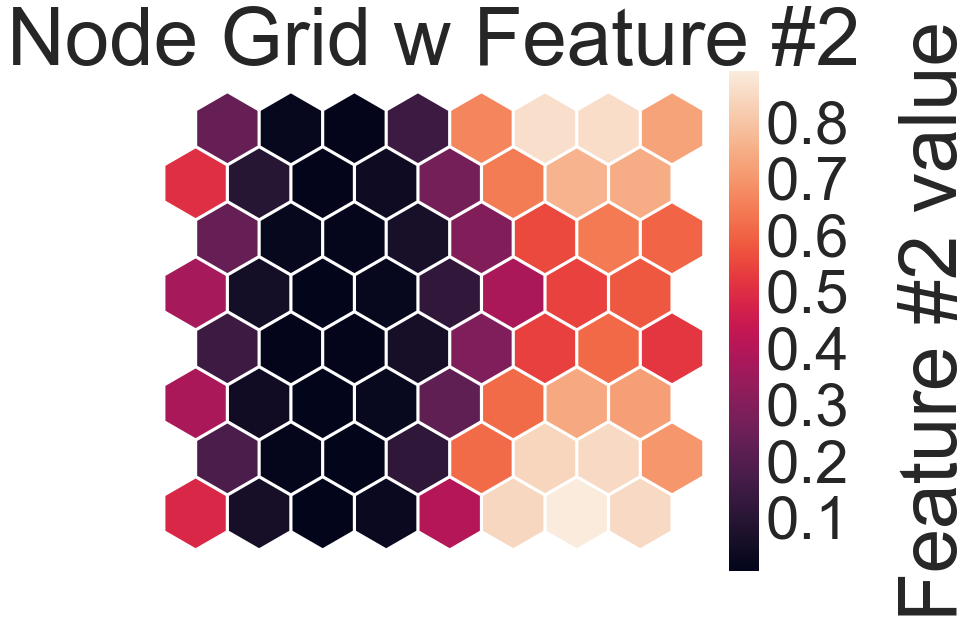

<Figure size 800x800 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
#Import the library
import SimpSOM as sps

#Build a network 20x20 with a weights format taken from the raw_data and activate Periodic Boundary Conditions. 
net = sps.somNet(8, 8, extractedData, PBC=True)

#Train the network for 10000 epochs and with initial learning rate of 0.01. 
net.train(0.1, 3000)

#Save the weights to file
net.save('filename_weights')

#Print a map of the network nodes and colour them according to the first feature (column number 0) of the dataset
#and then according to the distance between each node and its neighbours.
net.nodes_graph(colnum=0)
net.nodes_graph(colnum=1)
net.nodes_graph(colnum=2)

net.diff_graph()

#Project the datapoints on the new 2D network map.
net.project(extractedData)

#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(extractedData, type='qthresh')

In [125]:
import seaborn as sns
sns.__version__

'0.8.1'

In [126]:
d_s=d[['Well','Depth','GR','DT','RHOB']]
d_scut=d_s[['GR','DT','RHOB']]


In [127]:
d.shape

(51877, 22)

In [128]:
from scipy import stats
d_scut=d_scut[(np.abs(stats.zscore(d_scut)) < 3).all(axis=1)]

In [129]:
d_s=d_s.merge(d_scut,on=['GR','DT','RHOB'])

In [130]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(d_s[['GR','DT','RHOB']])
print(kmeans.labels_)
print(kmeans.cluster_centers_)
y_kmeans = kmeans.predict(d_s[['GR','DT','RHOB']])

[1 1 1 ... 2 2 2]
[[ 44.0424164   84.51406858   2.40045972]
 [ 11.53640007  67.03649884   2.54585863]
 [116.01160529  92.08457433   2.48356251]]


In [131]:
original_ds=d_s.copy()

In [132]:
d_s['Facies']=y_kmeans.tolist()

In [133]:
MWD1=d[['Well','Depth','ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD']]
MWD1_cut=MWD1[['ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD']]

In [134]:
from scipy import stats
MWD1_cut=MWD1_cut[(np.abs(stats.zscore(MWD1_cut)) < 3).all(axis=1)]

In [135]:
MWD1=MWD1.merge(MWD1_cut,on=['ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD'])

In [136]:
d_s=d_s.merge(MWD1,on=['Well','Depth'])

In [137]:
d_s.to_csv("Wells - Copy.csv",index=False)

In [141]:
d_s = pd.read_csv("Wells - Copy.csv")
d_s.shape

(72834, 13)

In [138]:
#Train_Set
d_train=d_s[d_s['Well']<10]


In [139]:
#Test_Set
d_test=d_s[d_s['Well']>=10]

In [140]:
LogData=d_s[['ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD']].values

In [141]:
RockType=d_s['Facies'].values

In [117]:
from sklearn.preprocessing import StandardScaler
X = LogData
y = RockType
X = StandardScaler().fit_transform(X)


from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [142]:
X_train=d_train[['ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD']].values
X_test=d_test[['ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD']].values
y_train=d_train[['Facies']].values
y_test=d_test[['Facies']].values

In [143]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [144]:
# Import the SVM library
from sklearn.svm import NuSVC
from sklearn.svm import SVC
classifier = SVC(C = 100, kernel = 'rbf') # Define the SVM model parameters 
classifier.fit(X_train, y_train) # Fit a classifier to the training data using y-labels corresponding to properties stored in X. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [182]:
y_pred = classifier.predict(X_test) # Predict the labels for the text X data

# If you do a train/test split, create a confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[4177 2001   40]
 [ 359 3527   35]
 [ 907  148   18]]
             precision    recall  f1-score   support

          0       0.77      0.67      0.72      6218
          1       0.62      0.90      0.74      3921
          2       0.19      0.02      0.03      1073

avg / total       0.66      0.69      0.66     11212



In [146]:
print('generalization performance: ', classifier.score(X_test,y_test))

generalization performance:  0.6887263646093471


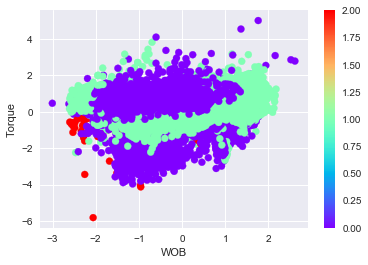

In [170]:
plt.scatter(X_test[:,1],X_test[:,2], c=y_pred, cmap='rainbow')
plt.xlabel('WOB')
plt.ylabel('Torque')
plt.colorbar()


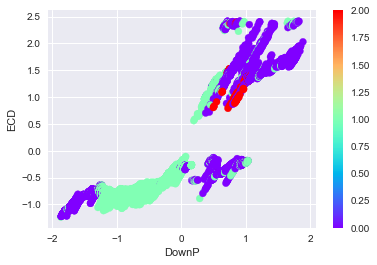

In [174]:
plt.scatter(X_test[:,4],X_test[:,6], c=y_pred, cmap='rainbow')
plt.xlabel('DownP')
plt.ylabel('ECD')
plt.colorbar()

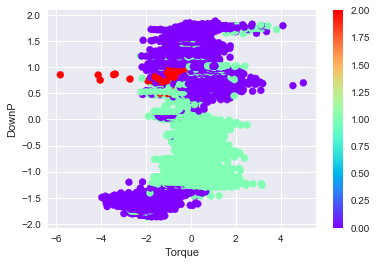

In [179]:
plt.scatter(X_test[:,2],X_test[:,4], c=y_pred, cmap='rainbow')
plt.xlabel('Torque')
plt.ylabel('DownP')
plt.colorbar()

RandomForest

In [231]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
r_clf=RandomForestClassifier(n_estimators = 200, max_depth=5)

In [232]:
r_clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [233]:
print('memorization performance: ', r_clf.score(X_train,y_train))

print('generalization performance: ', r_clf.score(X_test,y_test))

memorization performance:  0.9106648792036282
generalization performance:  0.6073849447021049


In [234]:
y_test_pred=r_clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.80      0.54      0.64      6218
          1       0.49      0.88      0.63      3921
          2       0.10      0.00      0.01      1073

avg / total       0.63      0.61      0.58     11212



In [235]:
feature_list=list(d_train[['ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD']].columns)
feature_list

['ROP', 'WOB', 'Torque', 'SurfRPM', 'DownP', 'Mudflow', 'ECD']

In [236]:
# Get numerical feature importances
importances = list(r_clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DownP                Importance: 0.32
Variable: ECD                  Importance: 0.21
Variable: SurfRPM              Importance: 0.15
Variable: Torque               Importance: 0.13
Variable: Mudflow              Importance: 0.08
Variable: ROP                  Importance: 0.06
Variable: WOB                  Importance: 0.05


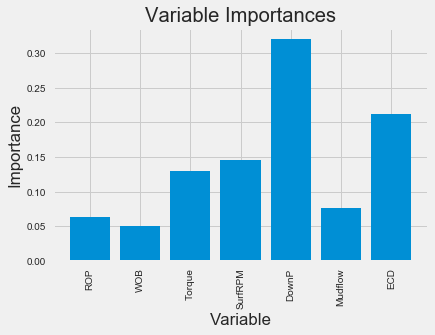

In [237]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting

x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis

plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [238]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, shuffle = True, random_state=125)

In [239]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3,4,5,6,7,8], 'min_samples_split': [5,10,15]} # dictionary with keys

grid = GridSearchCV(r_clf, param_grid=param_grid, cv=cv, verbose=3) 

In [240]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] max_depth=3, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_split=5, score=0.8484641054162745, total=   4.4s
[CV] max_depth=3, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_split=5, score=0.8560670888242341, total=   5.0s
[CV] max_depth=3, min_samples_split=5 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.3s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_split=5, score=0.8507615950710251, total=   5.2s
[CV] max_depth=3, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_split=10, score=0.8461538461538461, total=   5.0s
[CV] max_depth=3, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_split=10, score=0.8526441896286154, total=   3.8s
[CV] max_depth=3, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_split=10, score=0.8473386958754064, total=   4.5s
[CV] max_depth=3, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_split=15, score=0.8463249764695816, total=   4.9s
[CV] max_depth=3, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_split=15, score=0.8505904501112442, total=   4.3s
[CV] max_depth=3, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=3, min_samples_split=15, score=0.8488790005134349, total=   4.2s
[CV] max_depth=4, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_split=5, score=0.8887652947719689, total=   5.7s
[CV] max_depth=4, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_split=5, score=0.8937189799760397, total=   5.1s
[CV] max_depth=4, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_split=5, score=0.9009926407667295, total=   8.2s
[CV] max_depth=4, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_split=10, score=0.8900487721399846, total=   6.8s
[CV] max_depth=4, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_split=10, score=0.8948314222146158, total=   5.6s
[CV] max_depth=4, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_split=10, score=0.8987677562895773, total=   5.1s
[CV] max_depth=4, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_split=15, score=0.8873962522460854, total=   5.7s
[CV] max_depth=4, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_split=15, score=0.8974841690912203, total=   6.6s
[CV] max_depth=4, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_split=15, score=0.898168748930344, total=   7.2s
[CV] max_depth=5, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_split=5, score=0.9038247625566869, total=   7.5s
[CV] max_depth=5, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_split=5, score=0.9110901933938046, total=   6.2s
[CV] max_depth=5, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_split=5, score=0.9110901933938046, total=   6.0s
[CV] max_depth=5, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_split=10, score=0.9025412851886712, total=   6.6s
[CV] max_depth=5, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_split=10, score=0.9107479034742427, total=   6.1s
[CV] max_depth=5, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_split=10, score=0.9103200410747904, total=   6.0s
[CV] max_depth=5, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_split=15, score=0.9028835458201421, total=   5.8s
[CV] max_depth=5, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_split=15, score=0.9121170631524902, total=   5.9s
[CV] max_depth=5, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=5, min_samples_split=15, score=0.9136573677905185, total=   6.0s
[CV] max_depth=6, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_split=5, score=0.9099854539231624, total=   7.0s
[CV] max_depth=6, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_split=5, score=0.9191340065035085, total=   6.9s
[CV] max_depth=6, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_split=5, score=0.9170802669861372, total=   6.8s
[CV] max_depth=6, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_split=10, score=0.9110978009754428, total=   7.5s
[CV] max_depth=6, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_split=10, score=0.9178504193051514, total=   7.5s
[CV] max_depth=6, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_split=10, score=0.9184494266643848, total=   7.7s
[CV] max_depth=6, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_split=15, score=0.9107555403439719, total=   8.6s
[CV] max_depth=6, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_split=15, score=0.9171658394660277, total=   6.9s
[CV] max_depth=6, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_split=15, score=0.9175937018654801, total=   6.9s
[CV] max_depth=7, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=7, min_samples_split=5, score=0.9247882262342774, total=   8.2s
[CV] max_depth=7, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=7, min_samples_split=5, score=0.9286325517713503, total=   8.0s
[CV] max_depth=7, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=7, min_samples_split=5, score=0.9310285812082835, total=   7.8s
[CV] max_depth=7, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=7, min_samples_split=10, score=0.9244459656028066, total=   7.9s
[CV] max_depth=7, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=7, min_samples_split=10, score=0.9295738490501455, total=   7.5s
[CV] max_depth=7, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=7, min_samples_split=10, score=0.9298305664898169, total=   7.7s
[CV] max_depth=7, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=7, min_samples_split=15, score=0.9232480533926585, total=   7.8s
[CV] max_depth=7, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=7, min_samples_split=15, score=0.929488276570255, total=   8.1s
[CV] max_depth=7, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=7, min_samples_split=15, score=0.930943008728393, total=   7.6s
[CV] max_depth=8, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_split=5, score=0.9312911782322238, total=   9.5s
[CV] max_depth=8, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_split=5, score=0.9380455245593017, total=  12.8s
[CV] max_depth=8, min_samples_split=5 ................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_split=5, score=0.9366763648810542, total=  10.8s
[CV] max_depth=8, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_split=10, score=0.9309489176007529, total=   9.2s
[CV] max_depth=8, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_split=10, score=0.9358206400821496, total=  10.2s
[CV] max_depth=8, min_samples_split=10 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_split=10, score=0.9358206400821496, total=   9.1s
[CV] max_depth=8, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_split=15, score=0.9314623085479593, total=   8.7s
[CV] max_depth=8, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_split=15, score=0.936248502481602, total=   8.5s
[CV] max_depth=8, min_samples_split=15 ...............................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_split=15, score=0.9365052199212733, total=   8.4s


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  6.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=KFold(n_splits=3, random_state=125, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [241]:
print(grid.best_params_) 
print("score", grid.score(X_test,y_test)) 

{'max_depth': 8, 'min_samples_split': 5}
score 0.6196039957188726


In [242]:
print(grid.cv_results_.keys()) #for each parameter combination following metrics are stored


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])


In [243]:
import pandas as pd

cv_results = pd.DataFrame(grid.cv_results_)

# generate a subset of the table
cv_results_tiny = cv_results[['param_max_depth', 'param_min_samples_split', 'mean_test_score','std_test_score']]

# rank them based on test scores
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,param_max_depth,param_min_samples_split,mean_test_score,std_test_score
15,8,5,0.935338,0.002915
17,8,15,0.934739,0.002319
16,8,10,0.934197,0.002297
12,7,5,0.928150,0.002570
13,7,10,0.927950,0.002480


In [244]:
grid_new=grid.best_estimator_

In [245]:
print('memorization performance: ', grid_new.score(X_train,y_train)) # memorization

print('generalization performance: ', grid_new.score(X_test,y_test))  # generalization

memorization performance:  0.9419264668130866
generalization performance:  0.6196039957188726


PCA

In [326]:
d_pca=d_s[['GR','DT','RHOB']]

In [327]:
dpca=d_pca

In [328]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(dpca)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
y_kmeans = kmeans.predict(dpca)

[1 1 1 ... 2 2 2]
[[ 43.67232042  83.97561779   2.40660651]
 [ 11.32876413  66.91932523   2.54839223]
 [116.71018132  91.53289838   2.48708824]]


In [329]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [330]:
pca.fit(dpca)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

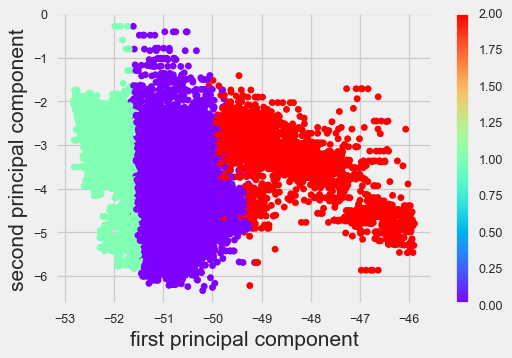

In [331]:
from sklearn.preprocessing import StandardScaler
X_dpca=np.array(dpca)
X_dpca = StandardScaler().fit_transform(X_dpca)
X_pca = pca.transform(X_dpca)
plt.rcParams['figure.dpi']=90
plt.scatter(X_pca[:, 0], X_pca[:, 2], linewidths=0, s=30,c=y_kmeans,cmap='rainbow')
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.colorbar()

Text(0.5,0.92,'3D Plot')

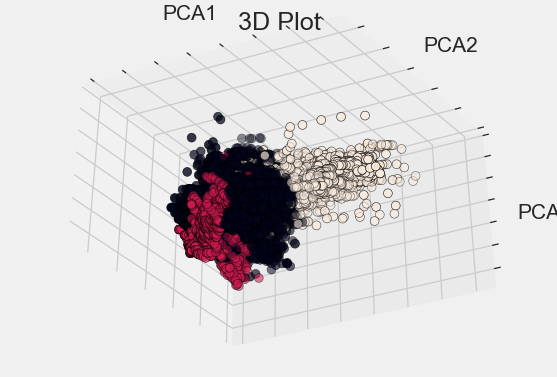

In [332]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import decomposition
from sklearn import datasets
fig = plt.figure(1)
ax = Axes3D(fig, elev=-40, azim=300) #3D plot
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_kmeans, s = 50, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D Plot')


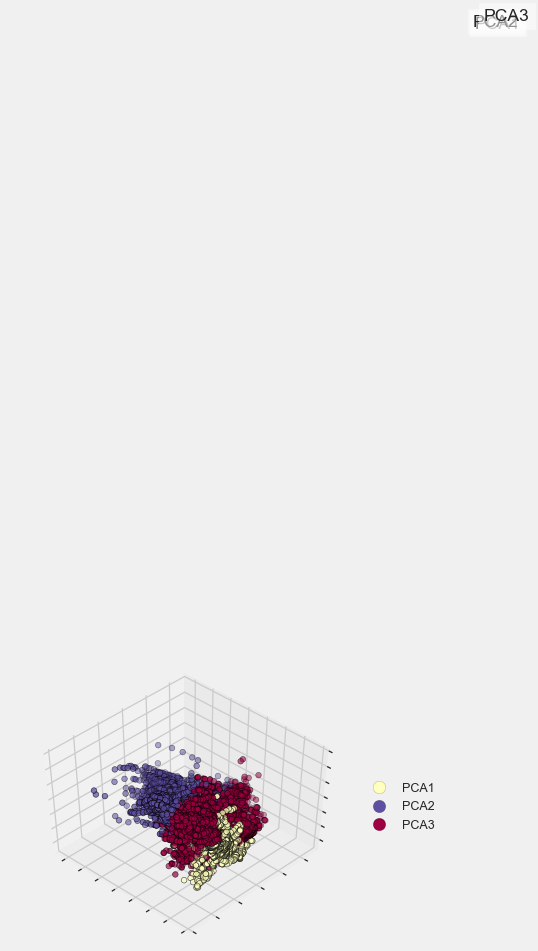

In [333]:
fig = plt.figure(figsize=(5.5, 3))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=48, azim=134)
labelTups = [('PCA1', 0), ('PCA2', 1), ('PCA3', 2)]
for name, label in labelTups:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results

sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_kmeans, cmap="Spectral", edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

colors = [sc.cmap(sc.norm(i)) for i in [1, 2, 0]]
custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in colors]
ax.legend(custom_lines, [lt[0] for lt in labelTups], 
          loc='center left', bbox_to_anchor=(1.0, .5))

plt.show()

In [321]:
pca.explained_variance_ratio_

array([9.20596096e-01, 7.93995915e-02, 4.31298791e-06])

In [322]:
pca = PCA(n_components=1).fit(X_pca)
X_pca=pca.transform(X_pca)
X_pca.shape

(46271, 1)

In [323]:
 inve = pca.inverse_transform(X_pca)

Text(0,0.5,'DT')

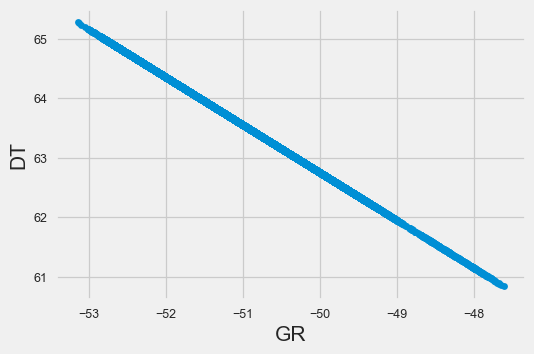

In [324]:
plt.rcParams['figure.dpi']=90
plt.scatter(inve[:,0],inve[:,1], linewidths=0, s=30)

plt.xlabel('GR')
plt.ylabel('DT')

In [349]:
log_pca=d_s[['ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD']]

In [350]:
Xlog_dpca=np.array(log_pca) 

In [351]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7) # creation of the model, instantiate
pca.fit(Xlog_dpca)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [352]:
from sklearn.preprocessing import StandardScaler
Xlog_dpca=np.array(Xlog_dpca)
Xlog_dpca = StandardScaler().fit_transform(Xlog_dpca)
X_pca = pca.transform(Xlog_dpca) 

In [358]:
X_pca_df = pd.DataFrame(X_pca)

In [361]:
log_pca=d_s[['ROP','WOB','Torque','SurfRPM','DownP','Mudflow','ECD']]
Xlog_dpca=np.array(log_pca) 

Eigenvalues in descending order:
2.0558609700378248
1.3775039535074927
1.1557501047763137
1.0029822094446177
0.7534139734534887
0.5369427864904106
0.11754600228985604


Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.